# Project 1, computer vision and embedding : 닮은 꼴 찾기
## 1. 얼굴 임베딩 만들기

file_list: ['정수빈.jpg', '잭 갤리퍼내키스.jpg', '아이즈원민주.jpg', '최현석.jpg', '로다주.jpeg', '주호민.jpeg', '차범근.jpeg', '이민호.jpeg', '곽도원.jpg', '크리스탈.jpg', '야마다 타카유키.jpeg', '슬리피.jpg', '박정민.jpg', '잇지유나.jpg', '차두리.jpeg', '백윤식.png', '개코.jpeg', '류승룡.jpeg', '정우성.jpeg', '트와이스정연.jpg', '슬기.jpg', '꽈두룹.jpeg', '이정재.jpeg', '배성우.png', '우기.jpg', '박해일.jpeg', '지드래곤.jpeg', '줄리엔강.png', '태연.jpg', '박항서.jpg', '이천수.jpg', '류진.jpg', '도아.jpeg', '화사.jpg', '김연우.jpeg', '매드클라운.jpeg', '온앤오프와이엇.jpg', '최무성.jpg', '첸.jpg', '김광현.jpg', '트와이스쯔위.jpg', '박재범.jpg', '길.jpg', '이승철.jpeg', '서장훈.jpg', '디오.jpeg', '로저 무어.jpeg', '수지.jpg', '숀 코네리.jpg', '배성재.jpg', '유재석.jpg', '장성호.jpeg', '아이유.jpg', '조정석.jpg', '개리.jpg', '백현.jpg', 'bush.jpeg', '박건우.png', '이준혁.jpeg', '한기범.jpg', '방시혁.jpeg', 'biden.jpg', '이성민.jpg', '온앤오프라운.jpg', '김학범.jpg', '토르.jpg', '이희준.jpg', '김고은.jpeg', '아이린.jpeg', '하승진.jpg', '다니엘 크레이그.jpeg', '톰 홀랜드.jpg', '잭 스페이더.jpeg', '강민경.jpg', '이승환.jpg', '이용진.jpg', '한석규.jpg', '안재홍.jpg', '솔라.jpg', '박찬욱.jpeg', '이대호.jpeg', '최준석.jpg', '장원영.jpeg', '리사.jpg', '류승

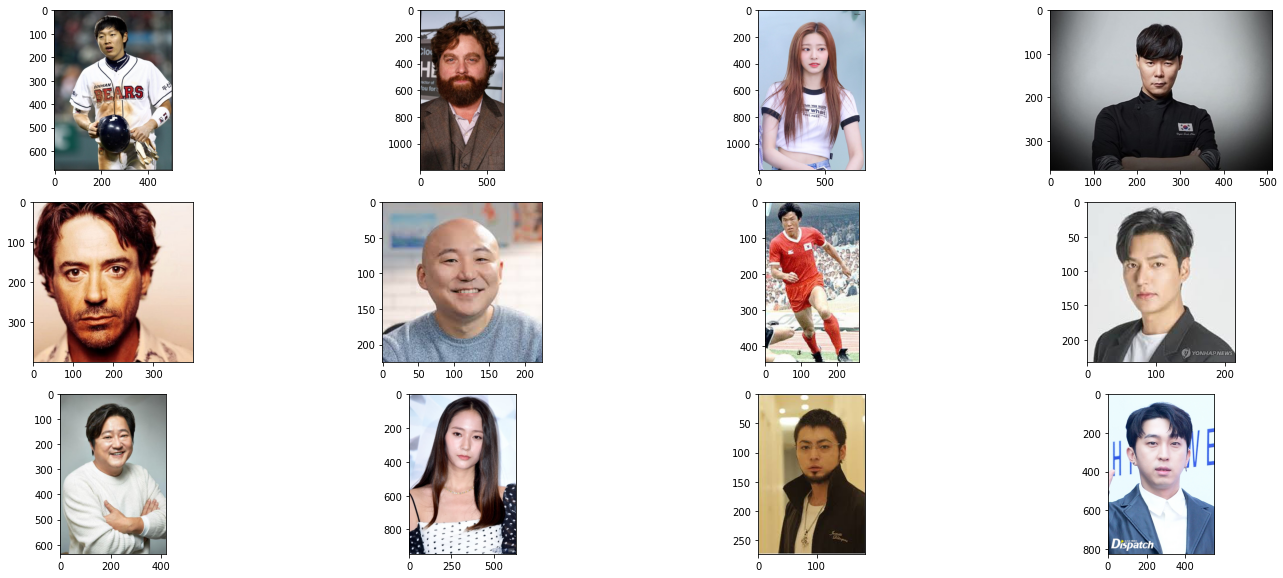

In [3]:
# 데이터 준비하기
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/project'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

# 출력시 행, 열 및 사이즈 지정
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24,10))

# 이미지 출력 반복문
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

[(246, 656, 708, 194)]


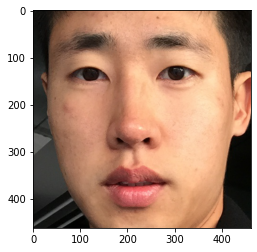

In [68]:
# 임베딩 추출 전 얼굴 탐지
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/face_embedding/project/image.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face 출력

[(502, 1093, 1168, 428)]


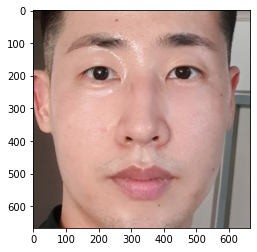

In [95]:
# 임베딩 추출 전 얼굴 탐지
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/face_embedding/project/image2.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face 출력

In [73]:
# 디렉토리 내 사진별 키, 값(임베딩) 적용
import numpy as np

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        try:
            face = get_cropped_face(img_path)
        except:
            continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            
    return embedding_dict

In [71]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['image']

array([-0.06243894,  0.08944868, -0.00045218, -0.01965885, -0.12118911,
        0.00395535, -0.10118772, -0.14871731,  0.08042589, -0.10084239,
        0.18580344, -0.0725732 , -0.19500569, -0.04444199, -0.0814654 ,
        0.20433733, -0.15217254, -0.10683127, -0.04866436, -0.01482571,
        0.09185503,  0.0362631 , -0.01506703,  0.02818685, -0.10358157,
       -0.27313668, -0.1175418 , -0.06215717,  0.01272734, -0.06154689,
       -0.07161681,  0.03654918, -0.16597787, -0.03066041,  0.03044179,
        0.06390313, -0.01973287, -0.04665547,  0.14232549,  0.01521464,
       -0.15281345,  0.09743828,  0.05584322,  0.22346653,  0.17957744,
        0.06558125,  0.02668018, -0.14471045,  0.09701239, -0.14922109,
       -0.01388447,  0.15284681,  0.08499654,  0.13075881, -0.02650221,
       -0.09067736,  0.06870875,  0.11681715, -0.12612092,  0.08430202,
        0.11040435, -0.06951089, -0.01497034, -0.0699123 ,  0.26011816,
        0.06253878, -0.12590306, -0.14173993,  0.11399775, -0.13

In [74]:
# 임베딩 거리 측정 함수(L2 Norm Distance)
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('image', 'image2')

0.3008565624808579

In [94]:
# name1과 name2의 거리를 비교하는 함수를 생성(name1은 미리 지정, name2는 호출시 인자로 불러들이기)
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 인자값에 따른 벡터간 거리 측정 함수
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

# 인자값에 따른 순위 지정
print('image와 비교', sep='\n')
get_nearest_face('image')

# 인자값에 따른 순위 지정
print('image2와 비교', sep='\n')
get_nearest_face('image2')

image와 비교
순위 1 : 이름(image2), 거리(0.3008565624808579)
순위 2 : 이름(박건우), 거리(0.37835441095707206)
순위 3 : 이름(이승철), 거리(0.39392462244854776)
순위 4 : 이름(철면수심), 거리(0.39946191299303196)
순위 5 : 이름(안재홍), 거리(0.4000488471493989)
image2와 비교
순위 1 : 이름(image), 거리(0.3008565624808579)
순위 2 : 이름(박건우), 거리(0.3792996140912431)
순위 3 : 이름(안재홍), 거리(0.40122703760451506)
순위 4 : 이름(슈퍼비), 거리(0.43145655822281304)
순위 5 : 이름(이승철), 거리(0.4335696565231862)
